In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [32]:
br = pd.read_csv(r"/content/drive/MyDrive/AML/Books_rating.csv")
bd = pd.read_csv(r"/content/drive/MyDrive/AML/books_data.csv")

In [33]:
br.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [34]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,3/1/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [35]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [36]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [37]:
br.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [38]:
books = pd.merge(br,bd, on = 'Title')

In [39]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999778 entries, 0 to 2999777
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
 10  description         object 
 11  authors             object 
 12  image               object 
 13  previewLink         object 
 14  publisher           object 
 15  publishedDate       object 
 16  infoLink            object 
 17  categories          object 
 18  ratingsCount        float64
dtypes: float64(3), int64(1), object(15)
memory usage: 457.7+ MB


In [40]:
books.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [41]:
df = books[['Title','Price', 'review/score','review/text', 'description', 'authors','categories', 'publishedDate', 'ratingsCount']]

In [42]:
df.drop_duplicates(inplace = True)
df.shape

<ipython-input-42-415e6b1c808b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2645706, 9)

In [43]:
df.isna().sum()

Title                207
Price            2168074
review/score           0
review/text            8
description       577048
authors           354245
categories        474195
publishedDate     312407
ratingsCount     1245323
dtype: int64

In [44]:
df.dropna(inplace = True)
df.isna().sum()

<ipython-input-44-37a09600be87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title            0
Price            0
review/score     0
review/text      0
description      0
authors          0
categories       0
publishedDate    0
ratingsCount     0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212104 entries, 47 to 2999713
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212104 non-null  object 
 1   Price          212104 non-null  float64
 2   review/score   212104 non-null  float64
 3   review/text    212104 non-null  object 
 4   description    212104 non-null  object 
 5   authors        212104 non-null  object 
 6   categories     212104 non-null  object 
 7   publishedDate  212104 non-null  object 
 8   ratingsCount   212104 non-null  float64
dtypes: float64(3), object(6)
memory usage: 16.2+ MB


In [46]:
df.shape

(212104, 9)

In [47]:
data = df.sample(3000)
data.shape

(3000, 9)

In [48]:
data.head()

,Title,Price,review/score,review/text,description,authors,categories,publishedDate,ratingsCount
1003749,The American Yoga Association's Easy Does It Y...,11.55,4.0,My wife has taken up Yoga and has gotten me to...,"Presents the concepts and techniques of yoga, ...","['Alice Christensen', 'American Yoga Associati...",['Family & Relationships'],11/18/1999,1.0
2256869,Under the Overpass: A Journey of Faith on the ...,10.19,5.0,If you're going to read a book about homelessn...,"An updated and expanded edition of the gritty,...",['Mike Yankoski'],['Religion'],1/21/2009,64.0
1567391,Promised Land (A Spenser Novel),7.56,4.0,"good read, good pace and story.Writer did not ...",Private investigator Spenser leaves Boston for...,['Robert B. Parker'],['Fiction'],1976,2.0
2650199,Calypso Magic (Magic Trilogy),7.99,4.0,Very good story. Excellent chemistry. I like t...,"While visiting London, a beautiful young woman...",['Catherine Coulter'],['Fiction'],1/6/2004,1.0
1818327,The Killer Angels (Turtleback School & Library...,13.80,5.0,"I read this book about three years ago, and ha...","Portraits of Lee, Longstreet, and other Civil ...",['Michael Shaara'],['Fiction'],5/1/1996,120.0


In [49]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')

In [50]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

In [51]:
data.head()

,Title,Price,review/score,review/text,description,authors,categories,publishedDate,ratingsCount
1003749,The American Yoga Association's Easy Does It Y...,11.55,4.0,My wife has taken up Yoga and has gotten me to...,"Presents the concepts and techniques of yoga, ...","Alice Christensen', 'American Yoga Association",Family & Relationships,11/18/1999,1.0
2256869,Under the Overpass: A Journey of Faith on the ...,10.19,5.0,If you're going to read a book about homelessn...,"An updated and expanded edition of the gritty,...",Mike Yankoski,Religion,1/21/2009,64.0
1567391,Promised Land (A Spenser Novel),7.56,4.0,"good read, good pace and story.Writer did not ...",Private investigator Spenser leaves Boston for...,Robert B. Parker,Fiction,1976,2.0
2650199,Calypso Magic (Magic Trilogy),7.99,4.0,Very good story. Excellent chemistry. I like t...,"While visiting London, a beautiful young woman...",Catherine Coulter,Fiction,1/6/2004,1.0
1818327,The Killer Angels (Turtleback School & Library...,13.80,5.0,"I read this book about three years ago, and ha...","Portraits of Lee, Longstreet, and other Civil ...",Michael Shaara,Fiction,5/1/1996,120.0


In [52]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [53]:
data.head()

,Title,Price,review/score,review/text,description,authors,categories,publishedDate,ratingsCount,word_count
1003749,The American Yoga Association's Easy Does It Y...,11.55,4.0,My wife has taken up Yoga and has gotten me to...,"Presents the concepts and techniques of yoga, ...","Alice Christensen', 'American Yoga Association",Family & Relationships,11/18/1999,1.0,23
2256869,Under the Overpass: A Journey of Faith on the ...,10.19,5.0,If you're going to read a book about homelessn...,"An updated and expanded edition of the gritty,...",Mike Yankoski,Religion,1/21/2009,64.0,488
1567391,Promised Land (A Spenser Novel),7.56,4.0,"good read, good pace and story.Writer did not ...",Private investigator Spenser leaves Boston for...,Robert B. Parker,Fiction,1976,2.0,73
2650199,Calypso Magic (Magic Trilogy),7.99,4.0,Very good story. Excellent chemistry. I like t...,"While visiting London, a beautiful young woman...",Catherine Coulter,Fiction,1/6/2004,1.0,30
1818327,The Killer Angels (Turtleback School & Library...,13.80,5.0,"I read this book about three years ago, and ha...","Portraits of Lee, Longstreet, and other Civil ...",Michael Shaara,Fiction,5/1/1996,120.0,50


In [54]:
# data.to_csv('refined_data.csv', index=False)

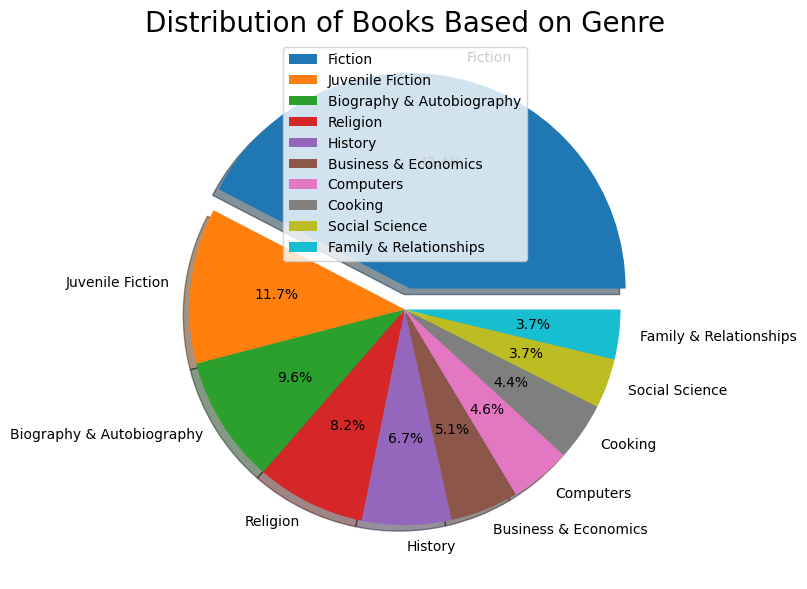

In [55]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

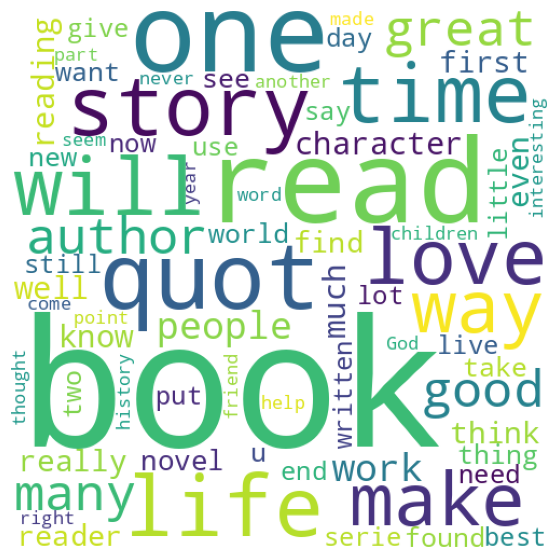

In [56]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

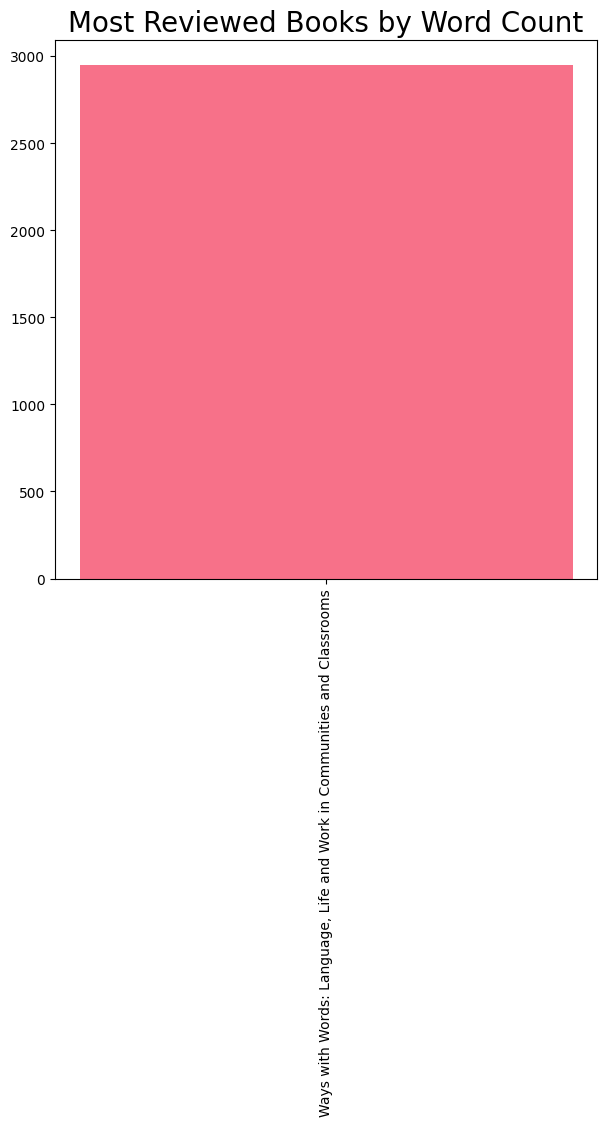

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 7))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert 'review/text' to numerical values using LabelEncoder
le = LabelEncoder()
data['review/text_encoded'] = le.fit_transform(data['review/text'])

# Select features and target variable
X = data[['Price', 'ratingsCount', 'review/text_encoded']]
y = data['review/score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define the kernel
kernel = 1.0 * RBF(1.0)

# Initialize Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the model
gpc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [60]:
from sklearn.metrics import classification_report, accuracy_score

# Predict
y_pred = gpc.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5716666666666667

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        39
         2.0       0.00      0.00      0.00        42
         3.0       0.00      0.00      0.00        55
         4.0       0.00      0.00      0.00       121
         5.0       0.57      1.00      0.73       343

    accuracy                           0.57       600
   macro avg       0.11      0.20      0.15       600
weighted avg       0.33      0.57      0.42       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Convert 'review/score' to binary labels (positive/negative)
data['review/sentiment'] = data['review/score'].apply(lambda x: 1 if x > 3.0 else 0)

# Select features and target variable
sX = data[['Price', 'ratingsCount', 'review/text_encoded']]
sy = data['review/sentiment']

# Split the data into training and testing sets
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.2, random_state=42)

In [64]:
# Define the kernel
kernel = 1.0 * RBF(1.0)

# Initialize Gaussian Process Classifier
sgpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the model
sgpc.fit(sX_train, sy_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [65]:
sy_pred = sgpc.predict(sX_test)

# Evaluate
print("Accuracy:", accuracy_score(sy_test, sy_pred))
print("\nClassification Report:\n", classification_report(sy_test, sy_pred))

Accuracy: 0.7733333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.77      1.00      0.87       464

    accuracy                           0.77       600
   macro avg       0.39      0.50      0.44       600
weighted avg       0.60      0.77      0.67       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Convert 'categories' to numerical values using LabelEncoder
nle = LabelEncoder()
data['genres_encoded'] = nle.fit_transform(data['categories'])

# Select features and target variable
nX = data[['review/text', 'genres_encoded']]
ny = data['review/sentiment']

# Split the data into training and testing sets
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.2, random_state=42)

In [67]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 445.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 383.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [68]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination

# Define the Bayesian Network structure
nmodel = BayesianModel([('genres_encoded', 'review/text'),
                       ('genres_encoded', 'review/sentiment'),
                       ('review/text', 'review/sentiment')])

# Learning the model parameters
nmodel.fit(data, estimator=MaximumLikelihoodEstimator)

# Performing exact inference using Variable Elimination
ninfer = VariableElimination(nmodel)

# Predicting on test data
npredictions = []
for index, record in nX_test.iterrows():
    evidence = {'genres_encoded': record['genres_encoded']}
    query = 'review/sentiment'
    result = ninfer.query(variables=[query], evidence=evidence)
    npredictions.append(1 if result.values[0] > 0.5 else 0)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(ny_test, npredictions))
print("\nClassification Report:\n", classification_report(ny_test, npredictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.22666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.23      1.00      0.37       136
           1       0.00      0.00      0.00       464

    accuracy                           0.23       600
   macro avg       0.11      0.50      0.18       600
weighted avg       0.05      0.23      0.08       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


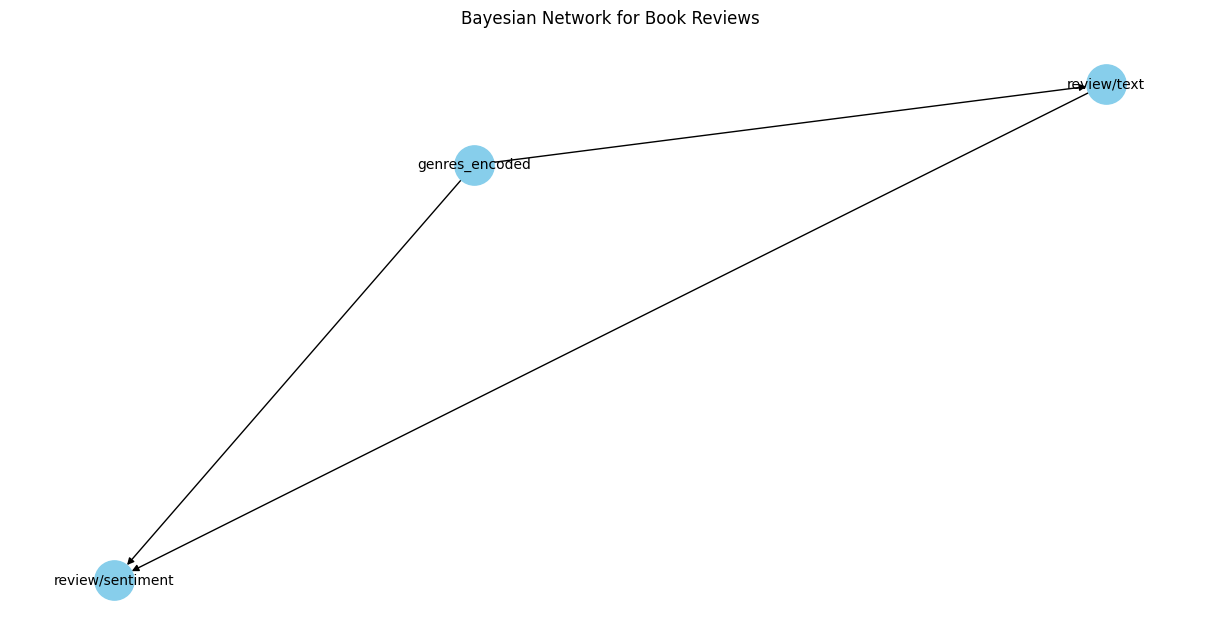

In [86]:
import networkx as nx
import matplotlib.pyplot as plt
# from pgmpy.visualization import plot_graph

# Convert the Bayesian Network to a networkx DiGraph
nx_graph = nx.DiGraph(nmodel.edges())

# Plot the graph
plt.figure(figsize=(12, 6))
nx.draw(nx_graph, with_labels=True, node_color='skyblue', font_size=10, node_size=800)
plt.title("Bayesian Network for Book Reviews")
plt.show()

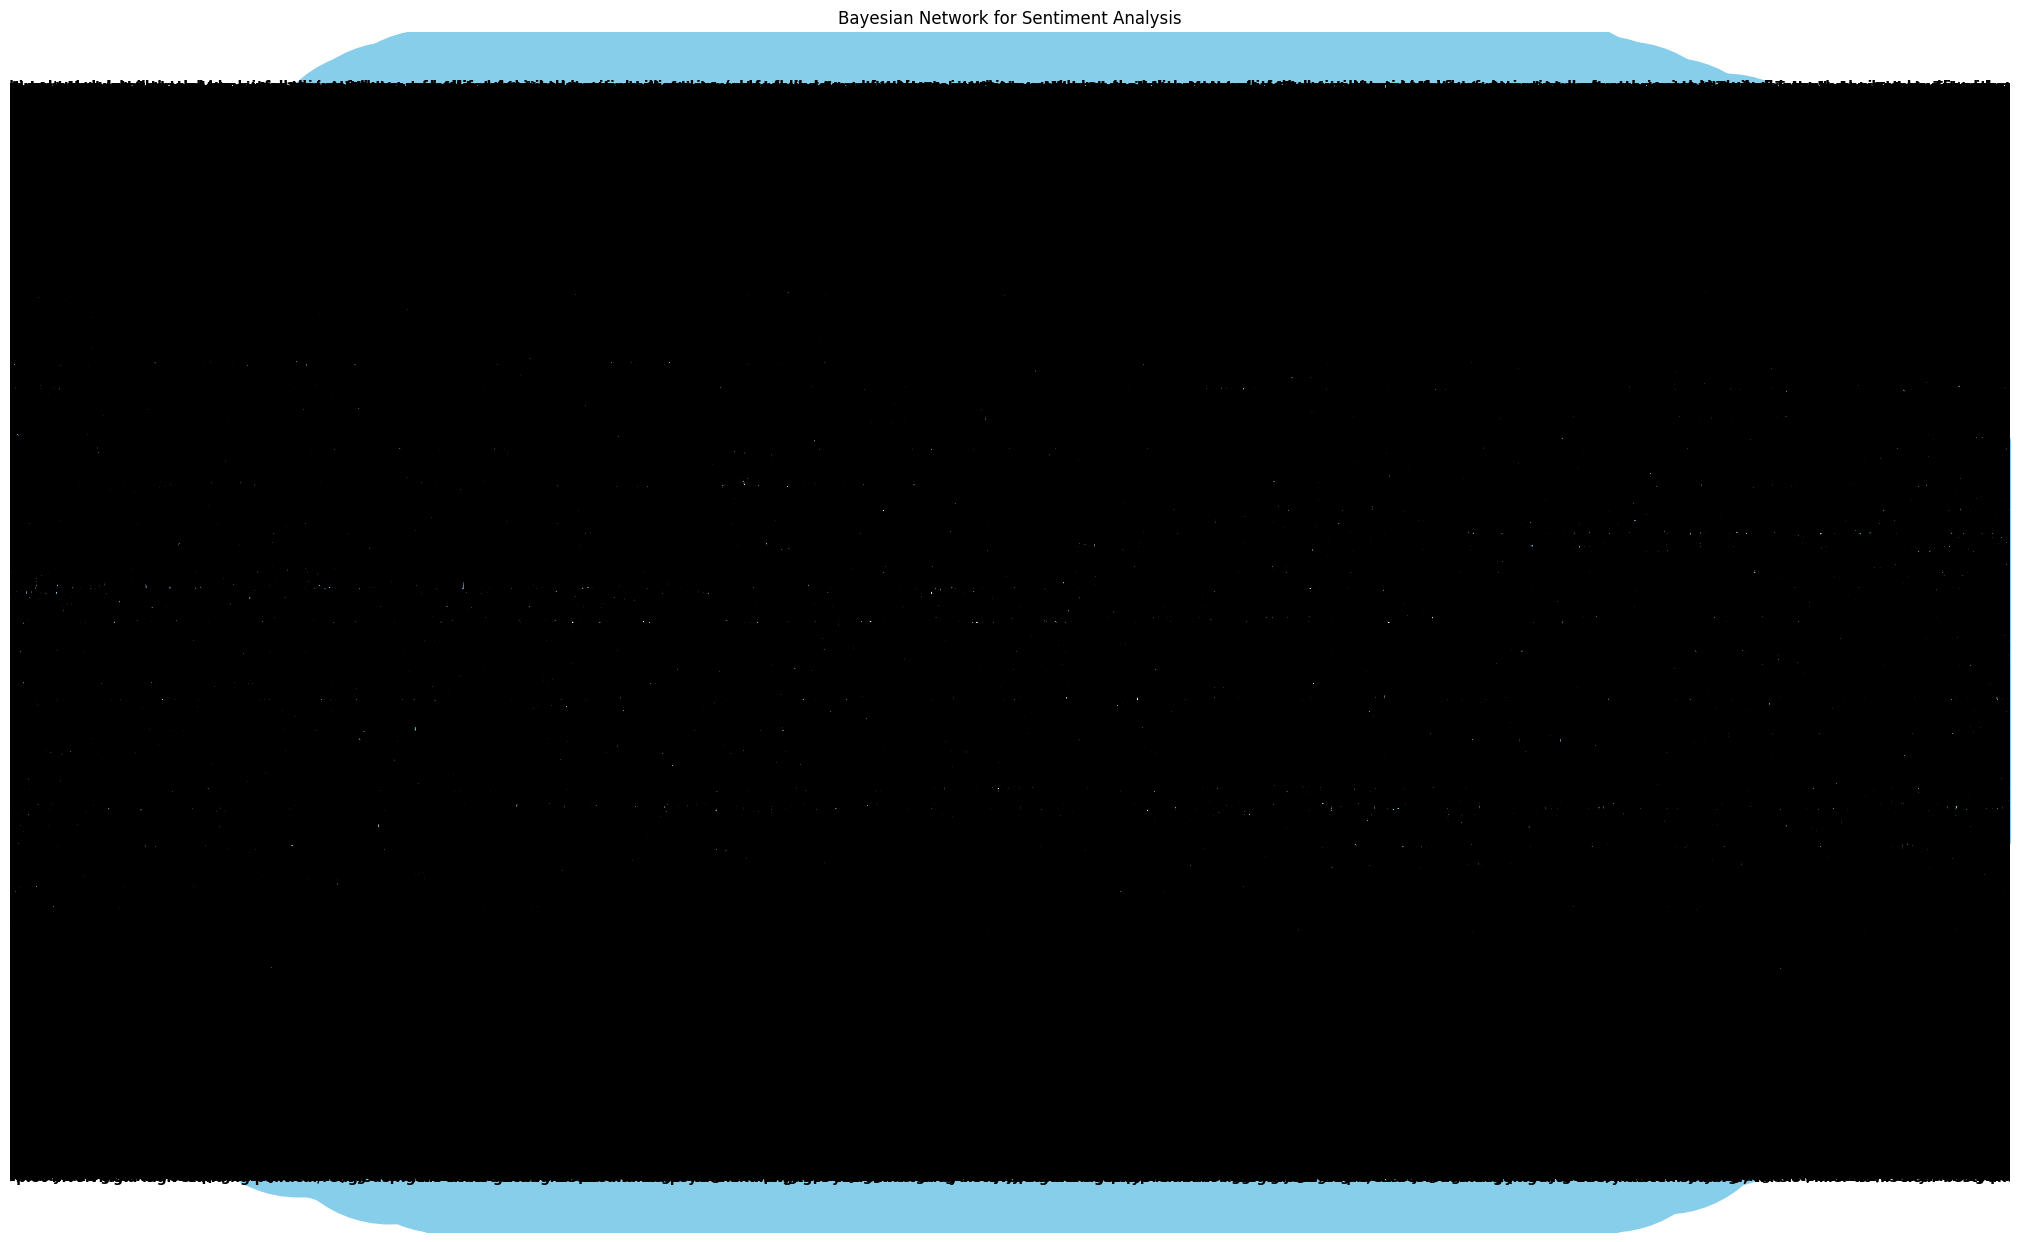

In [78]:
gnmodel = nx.DiGraph()
gnmodel.add_nodes_from(data['categories'])
gnmodel.add_nodes_from(data['review/sentiment'])
gnmodel.add_nodes_from(data['review/text'])

# Define edges (e.g., Sentiment depends on ReviewText)
gnmodel.add_edge('review/text', 'review/sentiment')

# Optimize the layout
pos = nx.spring_layout(gnmodel, k=0.15, iterations=20, center=(0, 0))

# Plot the network
plt.figure(figsize=(20, 12))
nx.draw(gnmodel, pos, with_labels=True, node_color='skyblue', node_size=30000, font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("Bayesian Network for Sentiment Analysis")
plt.show()

In [87]:
# Filter out the book reviews
book_reviews = data['review/text'].values

# Convert reviews to a list of strings
reviews_list = [str(review) for review in book_reviews]

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(reviews_list)

In [90]:
# Apply LDA
num_topics = 10  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [91]:
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics["Topic {}".format(topic_idx + 1)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

no_top_words = 10  # Number of words to display for each topic
feature_names = vectorizer.get_feature_names_out()

topics = display_topics(lda, feature_names, no_top_words)

for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}\n")

Topic 1: book, read, great, good, really, love, books, just, author, series

Topic 2: book, read, just, good, know, great, like, life, way, reading

Topic 3: god, book, women, church, men, bible, jesus, christian, life, world

Topic 4: quot, book, read, books, good, like, series, time, just, reading

Topic 5: book, recipes, quot, great, good, make, food, like, bread, cookbook

Topic 6: book, read, story, just, reading, characters, like, life, books, time

Topic 7: book, history, american, like, work, read, books, war, great, man

Topic 8: book, read, story, like, time, good, life, characters, novel, love

Topic 9: book, life, time, earth, way, universe, does, read, world, books

Topic 10: book, read, life, love, like, great, books, just, good, think

